In [1]:
import datasets
from datasets import load_dataset
import pandas as pd
from ipywidgets import FloatProgress
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import transformers

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 1. LOAD DATASET

In [2]:
import os
import json
import pandas as pd

def json_file_generator(folder_path):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                yield data
#                 count += 1
#                 if count >= max_files:
#                     break

folder_path_train = 'liputan6_data\\canonical\\raw\\train'
folder_path_test = 'liputan6_data\\canonical\\raw\\test'
folder_path_val = 'liputan6_data\\canonical\\raw\\dev'


# max_files = 0


data_generatorTrain = json_file_generator(folder_path_train)
data_generatorTest = json_file_generator(folder_path_test)
data_generatorVal = json_file_generator(folder_path_val)


train_list = list(data_generatorTrain)
test_list = list(data_generatorTest)
val_list = list(data_generatorVal)

# Create a DataFrame from the list of data
df_train = pd.DataFrame(train_list)
df_test = pd.DataFrame(test_list)
df_val = pd.DataFrame(val_list)


In [3]:
df_train.head()

,id,url,clean_article,clean_summary,extractive_summary
0,100000,https://www.liputan6.com/news/read/100000/yudh...,"[[Liputan6, ., com, ,, Jakarta, :, Presiden, S...","[[Menurut, Presiden, Susilo, Bambang, Yudhoyon...","[0, 1]"
1,100002,https://www.liputan6.com/news/read/100002/jepa...,"[[Liputan6, ., com, ,, Jakarta, :, Perdana, Me...","[[Pada, masa, silam, Jepang, terlalu, ambisius...","[2, 3]"
2,100003,https://www.liputan6.com/news/read/100003/pulu...,"[[Liputan6, ., com, ,, Kutai, :, Banjir, denga...","[[Puluhan, hektare, areal, persawahan, yang, s...","[1, 5]"
3,100004,https://www.liputan6.com/news/read/100004/pres...,"[[Liputan6, ., com, ,, Jakarta, :, Presiden, S...","[[Sekjen, PBB, Kofi, Annan, memuji, langkah, P...","[2, 5]"
4,100005,https://www.liputan6.com/news/read/100005/warg...,"[[Liputan6, ., com, ,, Solok, :, Warga, Kampun...","[[Untuk, mempercepat, pelaksanaan, belajar-men...","[0, 2]"


In [4]:
df_test.head()

,id,url,clean_article,clean_summary,extractive_summary
0,13019,https://www.liputan6.com/news/read/13019/kapol...,"[[Liputan6, ., com, ,, Jakarta, :, Kepolisian,...","[[Kapolda, Riau, baru, Brigjen, Pol, .], [John...","[0, 4, 9]"
1,13020,https://www.liputan6.com/news/read/13020/bi-di...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Kendati, Bank, Sentral, AS, menurunkan, suku...","[0, 4]"
2,13022,https://www.liputan6.com/news/read/13022/pemer...,"[[Liputan6, ., com, ,, Jakarta, :, Berbagai, k...","[[Pemerintah, bermaksud, akan, lebih, menganda...","[0, 7]"
3,13024,https://www.liputan6.com/news/read/13024/perub...,"[[Liputan6, ., com, ,, Jakarta, :, Penghapusan...","[[Revisi, Kepmennaker, Nomor, 78, Tahun, 2001,...","[0, 8]"
4,13025,https://www.liputan6.com/news/read/13025/puluh...,"[[Liputan6, ., com, ,, Jakarta, :, Operasi, Sa...","[[Polisi, menangkap, 32, pengunjung, Diskotik,...","[2, 3]"


In [5]:
df_val.head()

,id,url,clean_article,clean_summary,extractive_summary
0,1,https://www.liputan6.com/news/read/1/batas-pen...,"[[Liputan6, ., com, ,, Jakarta, :, Pemerintah,...","[[Pemerintah, memberikan, tenggat, 14, hari, k...","[1, 8]"
1,10,https://www.liputan6.com/news/read/10/belasan-...,"[[Liputan6, ., com, ,, Jakarta, :, Diperkiraka...","[[Satu, dari, 20, orang, Indonesia, diperkirak...","[2, 4]"
2,1000,https://www.liputan6.com/news/read/1000/lagi--...,"[[Liputan6, ., com, ,, Banda, Aceh, :, Aksi, p...","[[Peledakan, bom, kembali, terjadi, di, Aceh, ...","[2, 5]"
3,10000,https://www.liputan6.com/news/read/10000/penge...,"[[Liputan6, ., com, ,, Surabaya, :, Petugas, K...","[[Polres, Surabaya, Timur, menangkap, seorang,...","[0, 5]"
4,10001,https://www.liputan6.com/news/read/10001/menye...,"[[Liputan6, ., com, ,, Jakarta, :, Yogyakarta,...","[[Lima, seniman, Yogyakarta, dan, Bali, mengge...","[0, 2]"


## 2. Exploratory Data Analysis

### 2.1 Word and sentence counts

In [6]:
from itertools import chain
import pandas as pd
import string
from collections import Counter
import re


df_train['word_count_article'] = df_train['clean_article'].apply(lambda x: len(list(chain.from_iterable(x))))
df_train['sentence_count_article'] = df_train['clean_article'].apply(lambda x: len(x))
df_train['word_count_summary'] = df_train['clean_summary'].apply(lambda x: len(list(chain.from_iterable(x))))
df_train['sentence_count_summary'] = df_train['clean_summary'].apply(lambda x: len(x))


### 2.2 Punctuation count 

In [7]:
import string

df_train['punctuation_counts_article'] = df_train['clean_article'].apply(lambda arr: sum(Counter(char for sublist in arr for char in sublist if re.search(r'\W', char)).values()))
df_train['punctuation_counts_summary'] = df_train['clean_summary'].apply(lambda arr: sum(Counter(char for sublist in arr for char in sublist if re.search(r'\W', char)).values()))

### 2.3 Stopwords count

In [8]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()
df_train['stopwords_count_article'] = df_train['clean_article'].apply(lambda arr: sum(Counter(word for sublist in arr for word in sublist if word.lower() in stopwords).values()))
df_train['stopwords_count_summary'] = df_train['clean_summary'].apply(lambda arr: sum(Counter(word for sublist in arr for word in sublist if word.lower() in stopwords).values()))

In [9]:
#pip install Sastrawi --upgrade` install it if module not found

## 2.4 char count 

In [10]:
df_train['char_counts_article'] = df_train['clean_article'].apply(lambda arr: sum(len(char) for string in arr for char in string))

df_train['char_counts_summary'] = df_train['clean_summary'].apply(lambda arr: sum(len(char) for string in arr for char in string))

## 2.5 Sentence and Word Density

In [11]:
# Create a new variable containing the density of words in the text
df_train['clean_article_word_density'] = df_train['word_count_article'] / (df_train['char_counts_article'] + 1)
# Create a new variable containing the density of words in the summary
df_train['clean_summary_word_density'] = df_train['word_count_summary'] / (df_train['char_counts_summary'] + 1)
# Create a new variable containing the density of sentences in the text
df_train['clean_article_sent_density'] = df_train['sentence_count_article'] / (df_train['word_count_article'] + 1)
# Create a new variable containing the density of sentences in the summary
df_train['clean_summary_sent_density'] = df_train['sentence_count_summary'] / (df_train['word_count_summary'] + 1)

In [12]:
df_train.describe().drop('id', axis=1)

,word_count_article,sentence_count_article,word_count_summary,sentence_count_summary,punctuation_counts_article,punctuation_counts_summary,stopwords_count_article,stopwords_count_summary,char_counts_article,char_counts_summary,clean_article_word_density,clean_summary_word_density,clean_article_sent_density,clean_summary_sent_density
count,193883.000000,193883.000000,193883.000000,193883.000000,193883.000000,193883.000000,193883.000000,193883.000000,193883.000000,193883.000000,193883.000000,193883.000000,193883.000000,193883.000000
mean,234.065999,12.658820,30.985166,2.098523,41.843674,4.238242,43.918085,5.204298,1216.980999,168.079718,0.192972,0.183194,0.053903,0.066169
std,139.050558,8.575358,7.580206,0.666482,24.002112,2.265831,30.733221,2.385302,729.483617,36.403325,0.010718,0.017810,0.011153,0.015517
min,35.000000,1.000000,12.000000,1.000000,3.000000,1.000000,0.000000,0.000000,200.000000,50.000000,0.126729,0.118881,0.001797,0.016393
25%,149.000000,8.000000,27.000000,2.000000,28.000000,3.000000,25.000000,4.000000,769.000000,149.000000,0.185854,0.171053,0.046392,0.057143
50%,197.000000,10.000000,30.000000,2.000000,36.000000,4.000000,36.000000,5.000000,1025.000000,166.000000,0.192229,0.182390,0.053254,0.064516
75%,277.000000,15.000000,34.000000,2.000000,48.000000,5.000000,53.000000,6.000000,1447.000000,182.000000,0.199060,0.194286,0.060606,0.074074
max,7379.000000,406.000000,102.000000,12.000000,1249.000000,32.000000,1628.000000,32.000000,40653.000000,510.000000,0.413214,0.354839,0.182500,0.176471


## 2.6 Plotting

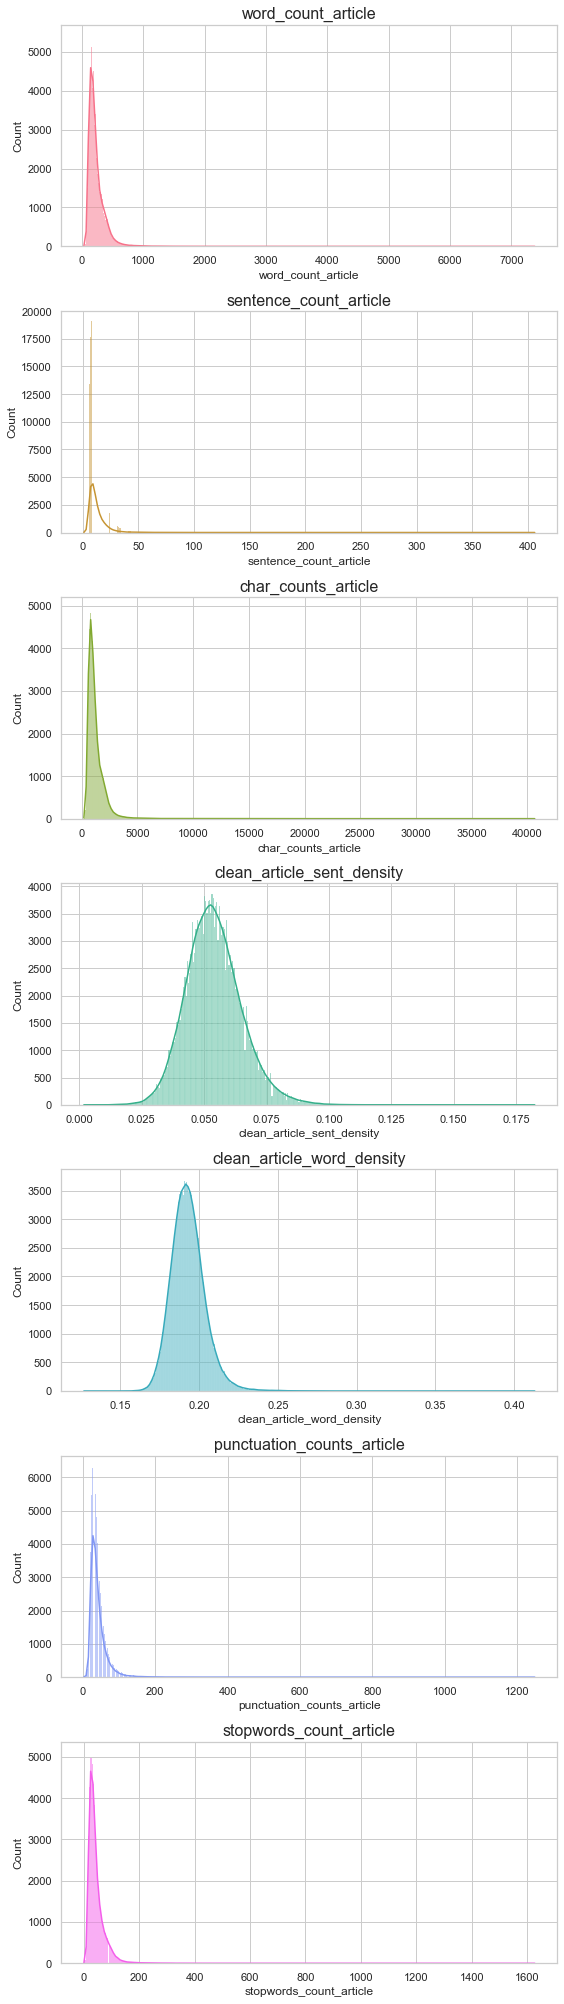

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = df_train  

plot_vars = np.array([['word_count_article', 'sentence_count_article', 'char_counts_article',
                       'clean_article_sent_density', 'clean_article_word_density', 'punctuation_counts_article', 'stopwords_count_article']])

variables_to_plot = np.ravel(plot_vars)

x_labels = ['word_count_article', 'sentence_count_article', 'char_counts_article',
                       'clean_article_sent_density', 'clean_article_word_density', 'punctuation_counts_article', 'stopwords_count_article']

sns.set(style="whitegrid")

num_rows = len(variables_to_plot)
num_cols = 1


plt.figure(figsize=(8, 4 * num_rows))


num_colors = len(variables_to_plot)
random_colors = sns.color_palette("husl", n_colors=num_colors)


for i, (variable, color, x_label) in enumerate(zip(variables_to_plot, random_colors, x_labels), start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[variable], kde=True, color=color)
    plt.xlabel(x_label)
    plt.title(f'{variable}', fontsize=16)  # Increase title font size
    plt.subplots_adjust(hspace=1.0)  # Add spacing between plots

plt.tight_layout()  
plt.show()


## 2.7 wordcloud

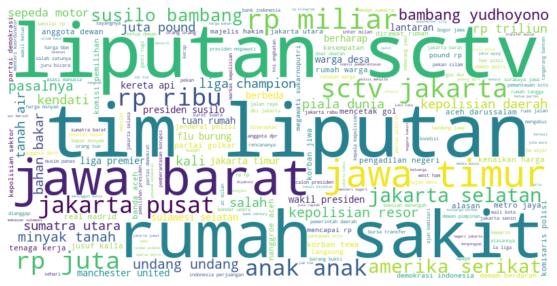

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

data = df_train['clean_article']

# Step 1: Join all the strings from the dataset
joined_text = " ".join(" ".join(str(word) for word in sentence) for sentence in data)

# remove punctuation and convert to lowercase
cleaned_text = "".join(c if c.isalnum() or c.isspace() else " " for c in joined_text)
cleaned_text = cleaned_text.lower()

# Step 2: Define Sastrawi's default stopwords and your personalized stopwords
sastrawi_stopword_remover = StopWordRemoverFactory()
sastrawi_stopwords = sastrawi_stopword_remover.get_stop_words()

# adding personalized stopwords
personalized_stopwords_file = "stopword_list_tala.txt"
with open(personalized_stopwords_file, "r") as file:
    personalized_stopwords = [line.strip() for line in file]

# Combine Sastrawi's stopwords with personalized stopwords
combined_stopwords = set(sastrawi_stopwords).union(personalized_stopwords)

# Step 3: Remove stopwords using the combined stopwords list
cleaned_text_no_stopwords = " ".join(word for word in cleaned_text.split() if word not in combined_stopwords)

# Step 4: Remove non-alphanumeric characters and punctuations
cleaned_text_no_special_chars = re.sub(r'[^a-zA-Z\s]', '', cleaned_text_no_stopwords)

# Step 5: Remove numerical values
cleaned_text_no_numerical = " ".join(word for word in cleaned_text_no_special_chars.split() if not word.isdigit())

# Step 6: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text_no_numerical)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## 2.8 Most commmon words

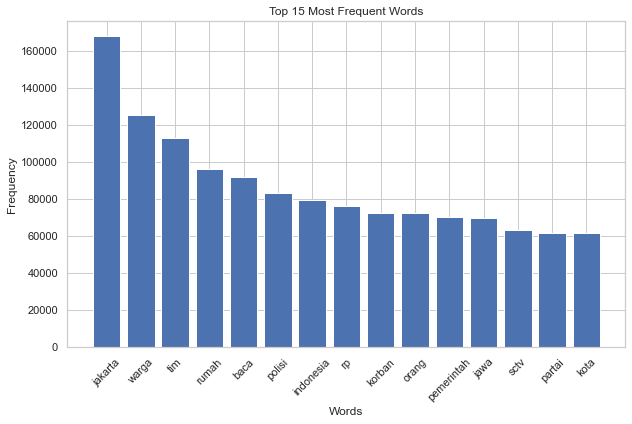

In [15]:
# Tokenize the cleaned_text to obtain individual words
words = cleaned_text_no_numerical.split()

# Count the frequency of each word
word_freq = Counter(words)

# Sort the words based on their frequencies in descending order
sorted_word_freq = word_freq.most_common()

# Select the top 15 words
top_words = dict(sorted_word_freq[:15])

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

### 3. Bert Model for text summarization

### 3.1 BERT2BERT Model

In [16]:
from transformers import BertTokenizer, BertForSequenceClassification, DataCollator, Trainer, TrainingArguments,AutoTokenizer,BertTokenizer, EncoderDecoderModel

In [17]:
from transformers import AutoTokenizer

model_name1 = 'cahya/bert2bert-indonesian-summarization'
tokenizer = AutoTokenizer.from_pretrained(model_name1)
model = EncoderDecoderModel.from_pretrained(model_name1)

# Step 1: Flatten the nested arrays and combine "clean_article" and "clean_summary" sequences
def flatten_nested_lists(nested_list):
    return [' '.join(inner_list) for outer_list in nested_list for inner_list in outer_list]

articles = flatten_nested_lists(df_train['clean_article'][:1])
summaries = flatten_nested_lists(df_train['clean_summary'][:1])

print(articles)
print(summaries)

['Liputan6 . com , Jakarta : Presiden Susilo Bambang Yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa-bangsa Asia dan Afrika saat ini adalah masalah kemiskinan yang sangat buruk .', 'Yudhoyono berharap masalah ini menjadi pembahasan penting dalam Konferensi Tingkat Tinggi Asia-Afrika .', 'Demikian pidato Yudhoyono saat membuka KTT Asia-Afrika di Jakarta Convention Centre , Jakarta , Jumat ( 22/4 ) [ baca : Presiden Yudhoyono Resmi Membuka KAA ] .', 'Pada awal pidatonya , Yudhoyono para peserta untuk mengheningkan cipta sejenak bagi korban gempa dan Tsunami di Nanggroe Aceh Darussalam dan Nias , Sumatra Utara .', 'Selanjutnya , Yudhoyono menegaskan pertemuan ini bukanlah sekadar romantisme , tetapi upaya bersama untuk memecahkan masalah yang dihadapi kedua benua .', 'Acara pembukaan konferensi ini juga dihadiri Sekretaris Jenderal Perserikatan Bangsa-Bangsa Kofi Annan yang datang sebagai tamu kehormatan .', 'Meski fokusnya adalah mempererat hubungan antara Asia dan Afr

In [18]:
# Step 2: Prepare the input articles and target summaries
ARTICLE_TO_SUMMARIZE = articles  
TARGET_SUMMARY = summaries       

In [19]:
# Step 3: Tokenize the input articles and target summaries
input_ids = tokenizer(ARTICLE_TO_SUMMARIZE, padding=True, truncation=True, return_tensors='pt')
summary_ids = tokenizer(TARGET_SUMMARY, padding=True, truncation=True, return_tensors='pt')

# Step 4: Ensure that both input_ids and summary_ids are PyTorch tensors
input_ids = input_ids.input_ids.to(model.device)
summary_ids_reference = summary_ids.input_ids.to(model.device)

# Print the first example for verification
print("Input Article:\n", ARTICLE_TO_SUMMARIZE[0])
print("Target Summary:\n", TARGET_SUMMARY[0])
print("Input IDs:\n", input_ids[0])
print("Summary IDs:\n", summary_ids_reference[0])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Input Article:
 Liputan6 . com , Jakarta : Presiden Susilo Bambang Yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa-bangsa Asia dan Afrika saat ini adalah masalah kemiskinan yang sangat buruk .
Target Summary:
 Menurut Presiden Susilo Bambang Yudhoyono , kemiskinan kini menjadi masalah serius yang dihadapi bangsa-bangsa di Asia dan Afrika .
Input IDs:
 tensor([    3, 17715,  1050,    17,  3036,    15,  2647,    29,  2601, 14977,
         9183, 15137,  8220,  1738,  8511,  2997,  1510, 13339,  2667,    16,
         2667,  3065,  1509,  3549,  1793,  1542,  1566,  3212, 11365,  1510,
         2059,  5576,    17,     1,     2])
Summary IDs:
 tensor([    3,  2379,  2601, 14977,  9183, 15137,    15, 11365,  3244,  1637,
         3212,  7695,  1510, 13339,  2667,    16,  2667,  1495,  3065,  1509,
         3549,    17,     1])


In [20]:
# generate summary
summary_ids = model.generate(
    input_ids=input_ids,
    min_length=20,
    max_length=80,
    num_beams=10,
    repetition_penalty=2.5,
    length_penalty=1.0,
    early_stopping=True,
    no_repeat_ngram_size=2,
    use_cache=True,
    do_sample=True,
    temperature=0.8,
    top_k=50,
    top_p=0.95
)

summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary_text)

presiden susilo bambang yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa - bangsa asia dan afrika saat ini adalah masalah kemiskinan yang sangat buruk.


In [21]:
from rouge import Rouge 
rouge = Rouge()

In [22]:
TARGET_SUMMARY = "".join(TARGET_SUMMARY)

print(TARGET_SUMMARY)

Menurut Presiden Susilo Bambang Yudhoyono , kemiskinan kini menjadi masalah serius yang dihadapi bangsa-bangsa di Asia dan Afrika .Diharapkan masalah ini menjadi agenda penting dalam KTT Asia-Afrika .


In [23]:
rouge = Rouge()
scores = rouge.get_scores(TARGET_SUMMARY,summary_text,  avg=True)

scores

{'rouge-1': {'r': 0.2727272727272727, 'p': 0.24, 'f': 0.2553191439565415},
 'rouge-2': {'r': 0.043478260869565216,
  'p': 0.038461538461538464,
  'f': 0.04081632154935504},
 'rouge-l': {'r': 0.18181818181818182, 'p': 0.16, 'f': 0.17021276097781818}}

### 3.2 Bert2Gpt Model 

In [24]:
from transformers import T5Tokenizer, T5Model, T5ForConditionalGeneration

model_name2 = 'cahya/bert2bert-indonesian-summarization'
tokenizer2 = T5Tokenizer.from_pretrained("cahya/t5-base-indonesian-summarization-cased")
model2 = T5ForConditionalGeneration.from_pretrained("cahya/t5-base-indonesian-summarization-cased")

You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


In [25]:
# Step 1: Flatten the nested arrays and combine "clean_article" and "clean_summary" sequences

articles2 = flatten_nested_lists(df_train['clean_article'][:1])
summaries2 = flatten_nested_lists(df_train['clean_summary'][:1])

print(articles2)
print(summaries2)

['Liputan6 . com , Jakarta : Presiden Susilo Bambang Yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa-bangsa Asia dan Afrika saat ini adalah masalah kemiskinan yang sangat buruk .', 'Yudhoyono berharap masalah ini menjadi pembahasan penting dalam Konferensi Tingkat Tinggi Asia-Afrika .', 'Demikian pidato Yudhoyono saat membuka KTT Asia-Afrika di Jakarta Convention Centre , Jakarta , Jumat ( 22/4 ) [ baca : Presiden Yudhoyono Resmi Membuka KAA ] .', 'Pada awal pidatonya , Yudhoyono para peserta untuk mengheningkan cipta sejenak bagi korban gempa dan Tsunami di Nanggroe Aceh Darussalam dan Nias , Sumatra Utara .', 'Selanjutnya , Yudhoyono menegaskan pertemuan ini bukanlah sekadar romantisme , tetapi upaya bersama untuk memecahkan masalah yang dihadapi kedua benua .', 'Acara pembukaan konferensi ini juga dihadiri Sekretaris Jenderal Perserikatan Bangsa-Bangsa Kofi Annan yang datang sebagai tamu kehormatan .', 'Meski fokusnya adalah mempererat hubungan antara Asia dan Afr

In [26]:
# Step 2: Prepare the input articles and target summaries
ARTICLE_TO_SUMMARIZE2 = articles2  
TARGET_SUMMARY2 = summaries2  

In [27]:
# Step 3: Tokenize the input articles and target summaries
input_ids2 = tokenizer2(ARTICLE_TO_SUMMARIZE2, padding=True, truncation=True, return_tensors='pt')
summary_ids2 = tokenizer2(TARGET_SUMMARY2, padding=True, truncation=True, return_tensors='pt')

# Step 4: Ensure that both input_ids and summary_ids are PyTorch tensors
input_ids2 = input_ids2.input_ids.to(model2.device)
summary_ids2_reference = summary_ids2.input_ids.to(model2.device)

# Print the first example for verification
print("Input Article:\n", ARTICLE_TO_SUMMARIZE2)
print("Target Summary:\n", TARGET_SUMMARY2)
print("Input IDs:\n", input_ids2[0])
print("Summary IDs:\n", summary_ids2_reference[0])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Input Article:
 ['Liputan6 . com , Jakarta : Presiden Susilo Bambang Yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa-bangsa Asia dan Afrika saat ini adalah masalah kemiskinan yang sangat buruk .', 'Yudhoyono berharap masalah ini menjadi pembahasan penting dalam Konferensi Tingkat Tinggi Asia-Afrika .', 'Demikian pidato Yudhoyono saat membuka KTT Asia-Afrika di Jakarta Convention Centre , Jakarta , Jumat ( 22/4 ) [ baca : Presiden Yudhoyono Resmi Membuka KAA ] .', 'Pada awal pidatonya , Yudhoyono para peserta untuk mengheningkan cipta sejenak bagi korban gempa dan Tsunami di Nanggroe Aceh Darussalam dan Nias , Sumatra Utara .', 'Selanjutnya , Yudhoyono menegaskan pertemuan ini bukanlah sekadar romantisme , tetapi upaya bersama untuk memecahkan masalah yang dihadapi kedua benua .', 'Acara pembukaan konferensi ini juga dihadiri Sekretaris Jenderal Perserikatan Bangsa-Bangsa Kofi Annan yang datang sebagai tamu kehormatan .', 'Meski fokusnya adalah mempererat hubungan ant

In [28]:
TARGET_SUMMARY2 = "".join(TARGET_SUMMARY2).replace("’", "'").strip("'")

print(TARGET_SUMMARY2)

Menurut Presiden Susilo Bambang Yudhoyono , kemiskinan kini menjadi masalah serius yang dihadapi bangsa-bangsa di Asia dan Afrika .Diharapkan masalah ini menjadi agenda penting dalam KTT Asia-Afrika .


In [29]:
# generate summary
summary_ids2 = model2.generate(input_ids2,
            min_length=20,
            max_length=80,
            num_beams=10,
            repetition_penalty=2.5,
            length_penalty=1.0,
            early_stopping=True,
            no_repeat_ngram_size=2,
            use_cache=True,
            do_sample = True,
            temperature = 0.8,
            top_k = 50,
            top_p = 0.95)

summary_text2 = tokenizer2.decode(summary_ids2[0], skip_special_tokens=True)
print(summary_text2)

Presiden Susilo Bambang Yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa-bangsa Asia dan Afrika saat ini adalah masalah kemiskinan.


In [30]:
from rouge import Rouge 
rouge = Rouge()

#TARGET_SUMMARY = "".join(TARGET_SUMMARY)

rouge = Rouge()
scores = rouge.get_scores(TARGET_SUMMARY2,summary_text2)

scores

[{'rouge-1': {'r': 0.6842105263157895, 'p': 0.52, 'f': 0.5909090860020663},
  'rouge-2': {'r': 0.3888888888888889,
   'p': 0.2692307692307692,
   'f': 0.3181818133471075},
  'rouge-l': {'r': 0.5789473684210527, 'p': 0.44, 'f': 0.49999999509297527}}]